In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import SGDClassifier
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('oasis_cross-sectional.csv')
df2 = pd.read_csv('oasis_longitudinal.csv')

In [3]:
print(df)
print(df2)

                ID M/F Hand  Age  Educ  SES  MMSE  CDR  eTIV   nWBV    ASF  \
0    OAS1_0001_MR1   F    R   74   2.0  3.0  29.0  0.0  1344  0.743  1.306   
1    OAS1_0002_MR1   F    R   55   4.0  1.0  29.0  0.0  1147  0.810  1.531   
2    OAS1_0003_MR1   F    R   73   4.0  3.0  27.0  0.5  1454  0.708  1.207   
3    OAS1_0004_MR1   M    R   28   NaN  NaN   NaN  NaN  1588  0.803  1.105   
4    OAS1_0005_MR1   M    R   18   NaN  NaN   NaN  NaN  1737  0.848  1.010   
5    OAS1_0006_MR1   F    R   24   NaN  NaN   NaN  NaN  1131  0.862  1.551   
6    OAS1_0007_MR1   M    R   21   NaN  NaN   NaN  NaN  1516  0.830  1.157   
7    OAS1_0009_MR1   F    R   20   NaN  NaN   NaN  NaN  1505  0.843  1.166   
8    OAS1_0010_MR1   M    R   74   5.0  2.0  30.0  0.0  1636  0.689  1.073   
9    OAS1_0011_MR1   F    R   52   3.0  2.0  30.0  0.0  1321  0.827  1.329   
10   OAS1_0012_MR1   M    R   30   NaN  NaN   NaN  NaN  1574  0.842  1.115   
11   OAS1_0013_MR1   F    R   81   5.0  2.0  30.0  0.0  1664  0.

In [4]:
Subjects = lambda string: string.split('_')[1]
df2['Subject ID'] = df2['Subject ID'].apply(Subjects)
print(df2)

    Subject ID         MRI ID        Group  Visit  MR Delay M/F Hand  Age  \
0         0001  OAS2_0001_MR1  Nondemented      1         0   M    R   87   
1         0001  OAS2_0001_MR2  Nondemented      2       457   M    R   88   
2         0002  OAS2_0002_MR1     Demented      1         0   M    R   75   
3         0002  OAS2_0002_MR2     Demented      2       560   M    R   76   
4         0002  OAS2_0002_MR3     Demented      3      1895   M    R   80   
5         0004  OAS2_0004_MR1  Nondemented      1         0   F    R   88   
6         0004  OAS2_0004_MR2  Nondemented      2       538   F    R   90   
7         0005  OAS2_0005_MR1  Nondemented      1         0   M    R   80   
8         0005  OAS2_0005_MR2  Nondemented      2      1010   M    R   83   
9         0005  OAS2_0005_MR3  Nondemented      3      1603   M    R   85   
10        0007  OAS2_0007_MR1     Demented      1         0   M    R   71   
11        0007  OAS2_0007_MR3     Demented      3       518   M    R   73   

In [5]:
bardata = df2.drop_duplicates('Subject ID').groupby('Group').count().reset_index()
print(bardata)

         Group  Subject ID  MRI ID  Visit  MR Delay  M/F  Hand  Age  EDUC  \
0    Converted          14      14     14        14   14    14   14    14   
1     Demented          64      64     64        64   64    64   64    64   
2  Nondemented          72      72     72        72   72    72   72    72   

   SES  MMSE  CDR  eTIV  nWBV  ASF  
0   14    14   14    14    14   14  
1   56    64   64    64    64   64  
2   72    72   72    72    72   72  


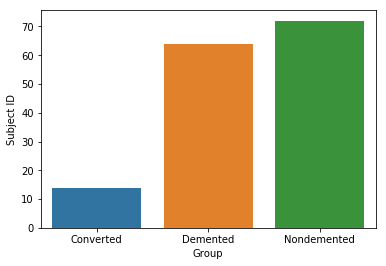

In [6]:
sns.barplot(data= bardata, x = 'Group', y = 'Subject ID')
plt.show()

In [7]:
#0: Converted, 1:Demented, 2.Nondemented
numchange = lambda row: 0 if row == 'Converted' else (1 if row == 'Demented' else 2)
df2['Group'] = df2.Group.apply(numchange)
#0 Male 1 Female
df2['M/F'] = df2['M/F'].apply(lambda gender: 0 if gender == 'M' else 1)
df2['Hand'] = df2['Hand'].apply(lambda Hand: 0 if Hand == 'M' else 1)
df2 = df2.dropna()

In [72]:
features = ['Visit','MR Delay',  'M/F',  'Hand',  'Age',  'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']
X_Train, X_Test, Y_Train, Y_Test = train_test_split(df2[features] , df2[['Group']], train_size = .8)
clf = SGDClassifier(loss="perceptron", penalty="l2", max_iter=500000, random_state = 42, learning_rate='adaptive', eta0 = .00001)
clf.fit(X_Train, Y_Train)

/Users/sarwaanansari/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/Users/sarwaanansari/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/Users/sarwaanansari/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=1e-05, fit_intercept=True,
       l1_ratio=0.15, learning_rate='adaptive', loss='perceptron',
       max_iter=500000, n_iter=None, n_iter_no_change=5, n_jobs=None,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [73]:
clf.score(X_Test, Y_Test)

0.9014084507042254

In [100]:
from sklearn.ensemble import RandomForestClassifier
clf2 = RandomForestClassifier(random_state=0)
clf2.fit(X_Train, Y_Train)

/Users/sarwaanansari/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/sarwaanansari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [101]:
print(clf2.score(X_Test, Y_Test))

0.9295774647887324


In [123]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
clf3 = ExtraTreesClassifier(n_estimators=5, min_samples_split=2, random_state=0)
clf3.fit(X_Train, Y_Train)
print(clf3.score(X_Test, Y_Test))


0.9577464788732394


/Users/sarwaanansari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
